# Lecture 9: Second Order ODE's

1. Little bit of white board stuff
2. using rk2.py to solve second order ODE's
3. Lambda, Map, Filter

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
%cd '/home/cody/Physics 331/Textbook Programs/Chapter 5'
%ls

/home/cody/Physics 331/Textbook Programs/Chapter 5
 baseball.py   'Lorenz Solutions.png'   __pycache__/   Untitled.ipynb
 efld.py       'new pic.png'            rk2.py
 long_ball.py   pendulum.py             tan_vec.py


In [13]:
# %load rk2.py
import numpy as np
def rk2(y0, t0, tf, dt, deriv_func):
    """
    General RK2 solver

    Inputs
    ----------
    y0:         Starting 'y' values. y0 Can be an array/list of any number of dimentions
    t0, tf:     Initial and Final independent variables
    dt:       Molasses  Step size for the independent variable
    deriv_func: Derivative function that I want to solve for

    Output
    ----------
    t:  Array of independent variables
    y:  Array of dependent variables values. The first intex corresponds to the time step and the second corresponds to
        the dependent variable number
    """

    t = np.arange(t0, tf+dt, dt)
    n_steps = len(t)    # Number of steps to take

    y = np.zeros((n_steps, len(y0))) #Makes an array of zeros

    y[0,:] = y0 #Sets the first row in y to be the initial values.

    for n in range(n_steps-1):
        f = deriv_func(y[n,:],t[n])
        y_star = y[n,:] + 0.5 * dt * f
        #Now take the full step
        t_star = t[n] + 0.5 * dt
        f_star = deriv_func(y_star, t_star)
        y[n+1,:] = (y[n,:] + dt*f_star)
      
    return t, y


Skydiver example but finding possition and velocity. For reference lets look at sky_diver.py from chapter 4

In [14]:
# %load '/home/cody/Physics 331/Textbook Programs/Chapter 4/sky_diver.py'
def sky_diver(v,t):
    """
    Acceleration of an object falling from gravity, with air resistance.
    dv/dt = g - alpha * v**2

    Input
    ----------
    v:  Velocity of the object

    t:  Dumby variable put in so that euler/rk2 can handle it. There should be
        away to get rid of this but I don't know what it is yet so for now it stays in

    Output
    ----------
    a: Acceleration for a given velocity

    """
    g = 9.8         # Acceleration from gravity (m/s/s)
    rho = 1.2       # Mass density of the air they're falling in (kg/m**3)
    a = 1.0         # cross-sectional area of the sky diver (m**2)
    C_d = 1.0       # coefficient of drag
   # C_d = 0
    M = 100.0       # mass of the diver (kg)
    
    alpha = 0.5 * rho * a * C_d / M
   
    return g - alpha * abs(v)*v


[0.]
[0.09799986]
[0.09799986]
[0.19599856]
[0.19599856]
[0.29399496]
[0.29399496]
[0.3919879]
[0.3919879]
[0.48997623]
[0.48997623]
[0.5879588]
[0.5879588]
[0.68593446]
[0.68593446]
[0.78390205]
[0.78390205]
[0.88186043]
[0.88186043]
[0.97980844]
[0.97980844]
[1.07774494]
[1.07774494]
[1.17566877]
[1.17566877]
[1.27357879]
[1.27357879]
[1.37147384]
[1.37147384]
[1.46935279]
[1.46935279]
[1.56721448]
[1.56721448]
[1.66505776]
[1.66505776]
[1.7628815]
[1.7628815]
[1.86068455]
[1.86068455]
[1.95846576]
[1.95846576]
[2.05622399]
[2.05622399]
[2.1539581]
[2.1539581]
[2.25166696]
[2.25166696]
[2.34934942]
[2.34934942]
[2.44700434]
[2.44700434]
[2.54463059]
[2.54463059]
[2.64222704]
[2.64222704]
[2.73979254]
[2.73979254]
[2.83732597]
[2.83732597]
[2.93482621]
[2.93482621]
[3.0322921]
[3.0322921]
[3.12972254]
[3.12972254]
[3.2271164]
[3.2271164]
[3.32447255]
[3.32447255]
[3.42178986]
[3.42178986]
[3.51906723]
[3.51906723]
[3.61630352]
[3.61630352]
[3.71349762]
[3.71349762]
[3.81064843]
[3.810

[35.91991334]
[35.94045455]
[35.94045455]
[35.96090737]
[35.96090737]
[35.98127212]
[35.98127212]
[36.00154913]
[36.00154913]
[36.02173872]
[36.02173872]
[36.04184123]
[36.04184123]
[36.06185699]
[36.06185699]
[36.08178632]
[36.08178632]
[36.10162954]
[36.10162954]
[36.12138699]
[36.12138699]
[36.14105898]
[36.14105898]
[36.16064584]
[36.16064584]
[36.18014789]
[36.18014789]
[36.19956545]
[36.19956545]
[36.21889885]
[36.21889885]
[36.23814841]
[36.23814841]
[36.25731443]
[36.25731443]
[36.27639725]
[36.27639725]
[36.29539718]
[36.29539718]
[36.31431454]
[36.31431454]
[36.33314964]
[36.33314964]
[36.3519028]
[36.3519028]
[36.37057433]
[36.37057433]
[36.38916454]
[36.38916454]
[36.40767376]
[36.40767376]
[36.42610229]
[36.42610229]
[36.44445044]
[36.44445044]
[36.46271852]
[36.46271852]
[36.48090685]
[36.48090685]
[36.49901572]
[36.49901572]
[36.51704546]
[36.51704546]
[36.53499636]
[36.53499636]
[36.55286874]
[36.55286874]
[36.57066289]
[36.57066289]
[36.58837912]
[36.58837912]
[36.6060

[40.00554074]
[40.00750941]
[40.00750941]
[40.00946865]
[40.00946865]
[40.0114185]
[40.0114185]
[40.01335901]
[40.01335901]
[40.01529023]
[40.01529023]
[40.0172122]
[40.0172122]
[40.01912496]
[40.01912496]
[40.02102855]
[40.02102855]
[40.02292303]
[40.02292303]
[40.02480843]
[40.02480843]
[40.0266848]
[40.0266848]
[40.02855217]
[40.02855217]
[40.0304106]
[40.0304106]
[40.03226012]
[40.03226012]
[40.03410077]
[40.03410077]
[40.03593261]
[40.03593261]
[40.03775567]
[40.03775567]
[40.03956998]
[40.03956998]
[40.04137561]
[40.04137561]
[40.04317257]
[40.04317257]
[40.04496093]
[40.04496093]
[40.04674071]
[40.04674071]
[40.04851195]
[40.04851195]
[40.05027471]
[40.05027471]
[40.05202901]
[40.05202901]
[40.05377491]
[40.05377491]
[40.05551243]
[40.05551243]
[40.05724162]
[40.05724162]
[40.05896251]
[40.05896251]
[40.06067516]
[40.06067516]
[40.06237959]
[40.06237959]
[40.06407585]
[40.06407585]
[40.06576397]
[40.06576397]
[40.06744399]
[40.06744399]
[40.06911596]
[40.06911596]
[40.07077991]


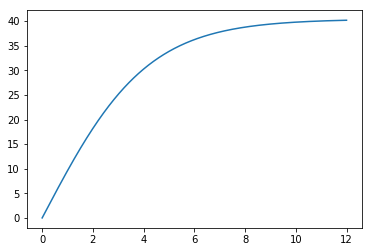

In [15]:
t, v = rk2([0], 0, 12, 0.01, sky_diver)
plt.plot(t,v)

In [16]:
# %load '/home/cody/Physics 331/Textbook Programs/Chapter 4/sky_diver.py'
def sky_diver2(y,t):
    """
    Acceleration of an object falling from gravity, with air resistance.
    dv/dt = g - alpha * v**2

    Input
    ----------
    y:  2d array of my dependent variables. For this function that is possition and velocity y = [x, v_x]

    t:  Dumby variable put in so that euler/rk2 can handle it. There should be
        away to get rid of this but I don't know what it is yet so for now it stays in

    Output
    ----------
    a: Acceleration for a given velocity

    """
    g = 9.8         # Acceleration from gravity (m/s/s)
    rho = 1.2       # Mass density of the air they're falling in (kg/m**3)
    #rho = 1400      # Mass density of molasses (kg/m**3)
    a = 1.0         # cross-sectional area of the sky diver (m**2)
    C_d = 1.0       # coefficient of drag
    #C_d = 0.0
    M = 100.0       # mass of the diver (kg)
    
    alpha = 0.5 * rho * a * C_d / M
    
    dxdt = y[1]    # Velocity differential equation
    
    dvdt = -g - alpha * abs(y[1]) * y[1] 
    
    
    return np.array([dxdt, dvdt])


In [17]:
t, y = rk2([ 914.4, 0], 0, 10, 0.01, sky_diver2) # Go over what 'y' is a little more

[914.4   0. ]
[ 9.14399510e+02 -9.79998559e-02]
[ 9.14399510e+02 -9.79998559e-02]
[ 9.14398040e+02 -1.95998559e-01]
[ 9.14398040e+02 -1.95998559e-01]
[ 9.14395590e+02 -2.93994958e-01]
[ 9.14395590e+02 -2.93994958e-01]
[ 9.14392160e+02 -3.91987899e-01]
[ 9.14392160e+02 -3.91987899e-01]
[ 9.14387750e+02 -4.89976231e-01]
[ 9.14387750e+02 -4.89976231e-01]
[ 9.14382361e+02 -5.87958802e-01]
[ 9.14382361e+02 -5.87958802e-01]
[ 9.14375991e+02 -6.85934460e-01]
[ 9.14375991e+02 -6.85934460e-01]
[ 9.14368642e+02 -7.83902053e-01]
[ 9.14368642e+02 -7.83902053e-01]
[ 9.14360313e+02 -8.81860432e-01]
[ 9.14360313e+02 -8.81860432e-01]
[914.35100469  -0.97980844]
[914.35100469  -0.97980844]
[914.34071689  -1.07774494]
[914.34071689  -1.07774494]
[914.32944979  -1.17566877]
[914.32944979  -1.17566877]
[914.31720352  -1.27357879]
[914.31720352  -1.27357879]
[914.30397822  -1.37147384]
[914.30397822  -1.37147384]
[914.28977404  -1.46935279]
[914.28977404  -1.46935279]
[914.27459116  -1.56721448]
[914.27459

[799.9606776 -34.9234339]
[799.9606776 -34.9234339]
[799.61131915 -34.94820311]
[799.61131915 -34.94820311]
[799.26171354 -34.97286865]
[799.26171354 -34.97286865]
[798.91186178 -34.9974309 ]
[798.91186178 -34.9974309 ]
[798.56176492 -35.02189021]
[798.56176492 -35.02189021]
[798.21142397 -35.04624695]
[798.21142397 -35.04624695]
[797.86083998 -35.07050146]
[797.86083998 -35.07050146]
[797.51001394 -35.09465412]
[797.51001394 -35.09465412]
[797.15894689 -35.11870528]
[797.15894689 -35.11870528]
[796.80763984 -35.14265529]
[796.80763984 -35.14265529]
[796.45609379 -35.16650451]
[796.45609379 -35.16650451]
[796.10430975 -35.19025331]
[796.10430975 -35.19025331]
[795.75228872 -35.21390202]
[795.75228872 -35.21390202]
[795.40003171 -35.23745102]
[795.40003171 -35.23745102]
[795.0475397  -35.26090065]
[795.0475397  -35.26090065]
[794.69481369 -35.28425127]
[794.69481369 -35.28425127]
[794.34185467 -35.30750323]
[794.34185467 -35.30750323]
[793.98866363 -35.33065688]
[793.98866363 -35.330656

In [12]:
print(y)

[[ 9.14400000e+02  0.00000000e+00]
 [ 9.14399510e+02 -9.79998559e-02]
 [ 9.14398040e+02 -1.95998559e-01]
 ...
 [ 6.25274937e+02 -3.97804336e+01]
 [ 6.24877117e+02 -3.97834773e+01]
 [ 6.24479267e+02 -3.97865066e+01]]


In [ ]:
[[ 9.14400000e+02  0.00000000e+00]
 [ 9.14399510e+02 -9.79998559e-02]
 [ 9.14398040e+02 -1.95998559e-01]
 ...
 [ 6.25274937e+02 -3.97804336e+01]
 [ 6.24877117e+02 -3.97834773e+01]
 [ 6.24479267e+02 -3.97865066e+01]]


# Pop Quiz!
What does 

    y[0,:], y[4,:], y[2,1], y[4,2], y[:,0], y[:, 1]
    
return?

In [19]:
y[:,1]

array([  0.        ,  -0.09799986,  -0.19599856, ..., -39.7804336 ,
       -39.78347734, -39.78650659])

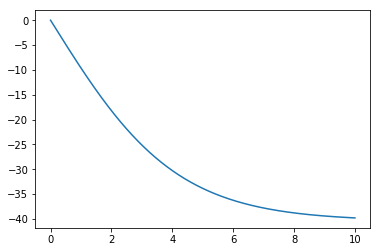

In [21]:
import matplotlib.pyplot as plt
plt.plot(t, y[:, 1])
plt.show()

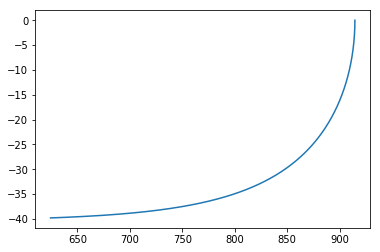

In [22]:
plt.plot(y[:,0], y[:,1])

In [28]:
# %load '/home/cody/Physics 331/Textbook Programs/Chapter 5/pendulum.py'
import numpy as np
def pendulum(y, t):
    """
    Returns the RHS of the equation for a damped pendulum.
    theta'' = -nu * theta' - (g/L) * sin(theta)

    Inputs
    ----------
    y:  Possition and velocity. y[0] should be the possition (theta in this case)
        and y[1] will be the derivative of y[0] so theta' (dtheta / dt)

    t:  Time. Not used in the program but when I feed this into rk2

    Output:
    ----------
    Vector of the results of integrating the velocity and possition. f[0] should be y[1], integral of
    the possitions is just the velocity. f[1] will be the acceleration.
    """

    g = 9.8  #Acceleration of gravity (m/s**2)
    L = 9.8  #Length of the pendulum (m)
    #nu = 0.1 #Damping coefficient (s**-1)
    nu = 0.0
    
    a = -nu * y[1] - (g/L)*np.sin(y[0])
    
    return np.array([y[1], a])  #Make the output a numpy array so that we can do math with it. If we don't turn
                                #this into an array then when we pass pendulum to rk2 we get an error in the line
                                #y_star = y[n][:] + 0.5 * dt * f because we can't multiply at list 'f' with
                                #a number 'dt'


In [29]:
t, theta = rk2([0, 1], 0, 30, 0.001, pendulum)

The outputs are the normal time, and theta is a t x 2 array. The first colum is the position value, and the second colum is the velocity. Each row/element of theta is composed of the position and velocity at each time. 

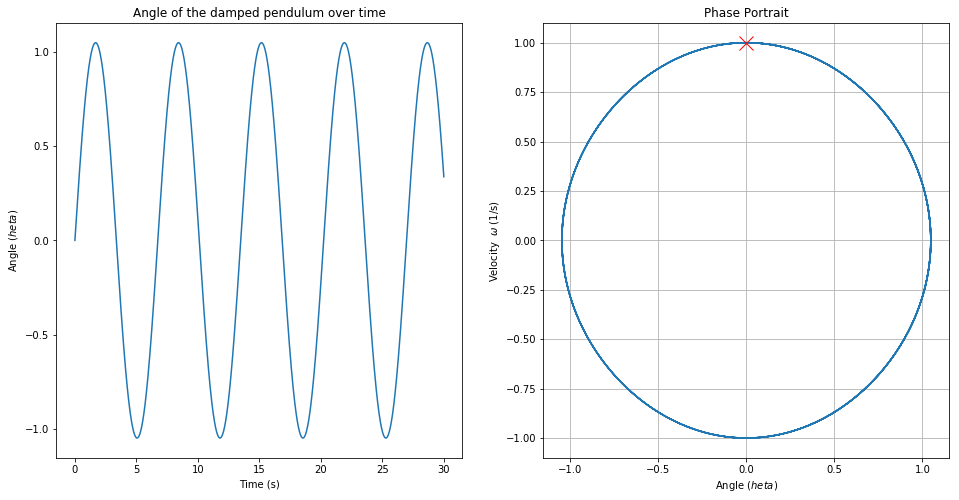

In [30]:
import matplotlib.pyplot as plt
fig , (ax1, ax2) = plt.subplots(1,2, figsize = (16,8))
ax1.plot(t, theta[:,0])
ax1.set_xlabel('Time (s)')
ax1.set_title('Angle of the damped pendulum over time')
ax1.set_ylabel('Angle ($\theta$)')

ax2.plot(theta[:, 0], theta[:, 1])
ax2.plot(theta[0,0], theta[0,1], 'x', color = 'r', markersize = 14) # Make a red 'x' at the starting point
ax2.set_title('Phase Portrait')
ax2.set_xlabel('Angle ($\theta$)')
ax2.set_ylabel('Velocity  $\omega$ (1/s)')

ax2.grid()
plt.show()

## Numerical errors
I should return to the exact same point after one full oscilation, but do I?

First question what is the period?

In [31]:
 g = 9.8  #Acceleration of gravity (m/s**2)
L = 9.8  #Length of the pendulum (m)
omega = np.sqrt(g/L)
T = 2*np.pi / omega # Remember this is the period only in the small angle limit

In [43]:
t, theta2 = rk2([0.05, 0], 0, 10*T, 0.001, pendulum) # Notice we changed the initial conditions

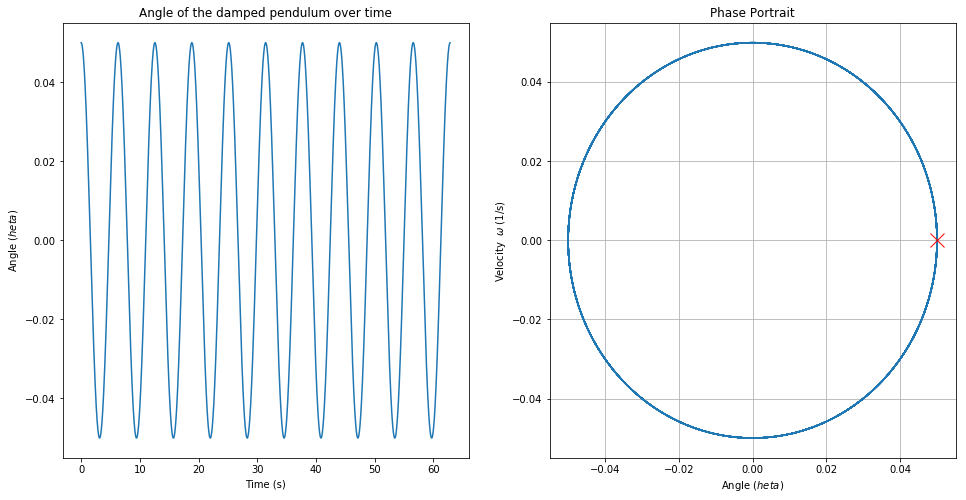

In [44]:
fig , (ax1, ax2) = plt.subplots(1,2, figsize = (16,8))
ax1.plot(t, theta2[:,0])
ax1.set_xlabel('Time (s)')
ax1.set_title('Angle of the damped pendulum over time')
ax1.set_ylabel('Angle ($\theta$)')

ax2.plot(theta2[:, 0], theta2[:, 1])
ax2.plot(theta2[0,0], theta2[0,1], 'x', color = 'r', markersize = 14) # Make a red 'x' at the starting point
ax2.set_title('Phase Portrait')
ax2.set_xlabel('Angle ($\theta$)')
ax2.set_ylabel('Velocity  $\omega$ (1/s)')

ax2.grid()
plt.show()

In [45]:
theta2[0], theta2[-1] # dt = 0.001

(array([0.05, 0.  ]), array([0.04999767, 0.00048287]))

In [46]:
theta2[0], theta2[-1] # dt = 0.00001

(array([0.05, 0.  ]), array([0.04999767, 0.00048287]))

Why don't we return to the exact value? 

Could be that the period is off. The period of oscilation that we found is true only in the small angle limit. We have a small angle so it's really close but if we used our old initial conditions we would see that that we don't return to the starting values for one orbit. 

More likely it's because of numerical errors

### Total Energy
The total energy should be conserved, there's no friction or anything so lets make sure that it's conserved. 

In [47]:
def KE_NRG(theta):
    m = 1 # Need a dumby mass so lets just pick one to make our life easy
    L = 9.8
    KE = 1/2 * m * (theta[:,1] *L)**2
    return KE
def U_NRG(theta):
    m = 1 # Need a dumby mass so lets just pick one to make our life easy
    g = 9.8
    L = 9.8
    U = m * g * L *(1-np.cos(theta[:,0]))
    return U

In [48]:
K = KE_NRG(theta2)
U = U_NRG(theta2)

Text(0,0.5,'Energy(t) -  Energy(0)')

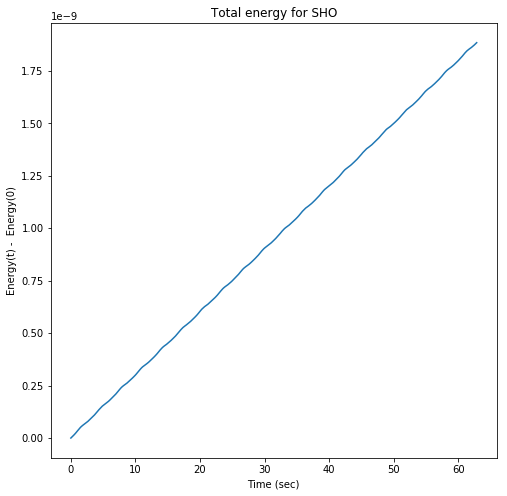

In [49]:
plt.figure(figsize = (8,8))
plt.plot(t, (K + U) - (U[0])) # Plot the total energy over time minus the initial energy
plt.title('Total energy for SHO')
plt.xlabel('Time (sec)')
plt.ylabel('Energy(t) -  Energy(0)')